# Abgabe 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io

2. kumulative Histogramm eines 8-Bit Graustufenbildes

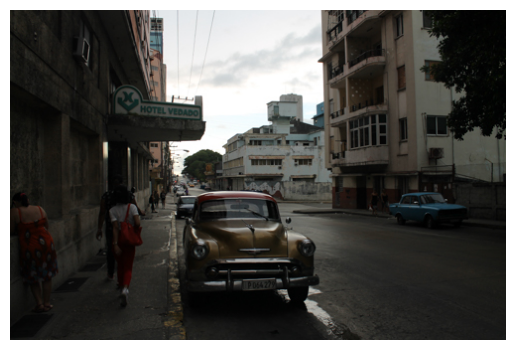

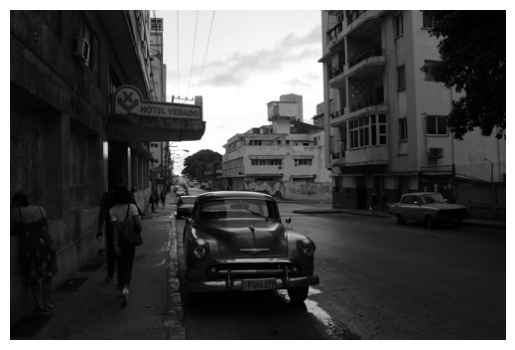

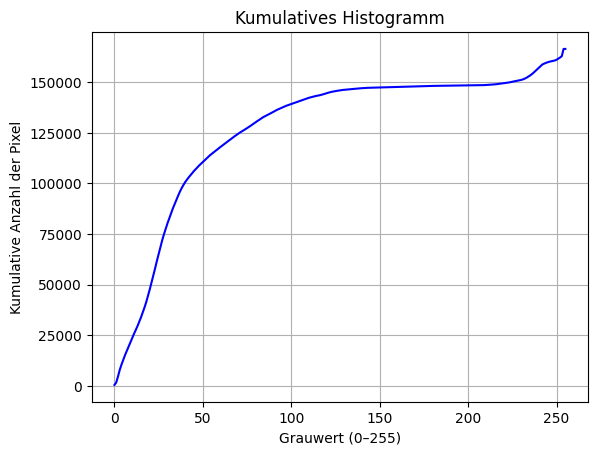

In [ ]:
#load images
images = []
for file in os.listdir('.'):
    if file.endswith(('.jpg')):
        img = io.imread(file)
        images.append(img)

plt.imshow(images[0])
plt.axis('off') 
plt.show()

#convert to gray image 
def gray_converter(image):
    gray_image = 0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]
    gray_image = gray_image.astype('uint8')
    return gray_image

gray_image = gray_converter(images[0])
plt.imshow(gray_image, cmap='gray')
plt.axis('off') 
plt.show()

#calculate cumulative histogram
def compute_cumHisto(image):
    histogram = np.zeros(256, dtype=int)

    for line in image:
        for pixel in line:
            histogram[pixel] += 1

    cumHisto = np.zeros(256, dtype=int)
    cumHisto[0] = histogram[0] #smallest value

    for i in range(1, 256):
        cumHisto[i] = cumHisto[i - 1] + histogram[i]

    return cumHisto

cumHisto = compute_cumHisto(gray_image)

plt.plot(range(256), cumHisto, color='blue')
plt.title("Kumulatives Histogramm")
plt.xlabel("Grauwert (0–255)")
plt.ylabel("Kumulative Anzahl der Pixel")
plt.grid(True)
plt.show()

